# 2. The Simple Regression Model

:::{important} Learning Objectives
:class: dropdown
By the end of this chapter, you should be able to:

**2.1** List the assumptions of the simple linear regression model and interpret the parameters in the model.

**2.2** Apply the formulas for the slope and intercept estimates using ordinary least squares estimation.

**2.3** Use the formulas to calculate the fitted values and residuals, and list the properties of these statistics on any sample of data.

**2.4** Compute and interpret the R-squared of a simple regression.

**2.5** List and interpret the assumptions used to obtain unbiasedness of the ordinary least squares (OLS) estimator.

**2.6** Explain the meaning of the homoskedasticity (constant variance) assumption, and discuss its role in calculating the sampling variance of the OLS estimators.

**2.7** Discuss the limitations of the simple regression model for uncovering causal effects.

**2.8** Interpret the simple regression estimates in the case of a binary (dummy) explanatory variable.

**2.9** Describe the potential outcomes framework for causal inference and explain how experimental interventions (randomized controlled trials) can be analyzed using simple regression.
:::

Welcome to this notebook, which delves into the fundamental concepts of the Simple Linear Regression model. This model is a cornerstone of econometrics and statistical analysis, used to understand the relationship between two variables. In this chapter, we will explore the mechanics of Ordinary Least Squares (OLS) regression, learn how to interpret its results, and understand the crucial assumptions that underpin its validity.

We will use real-world datasets from the popular Wooldridge package to illustrate these concepts, making the theory come alive with practical examples. By the end of this notebook, you will have a solid grasp of simple regression, its properties, and how to apply it in Python.

Let's start by importing the necessary libraries and setting up our environment.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import wooldridge as wool
from IPython.display import display
from scipy import stats

# Set plotting style for enhanced visualizations
sns.set_style("whitegrid")  # Clean seaborn style with grid
sns.set_palette("husl")  # Attractive color palette
plt.rcParams["figure.figsize"] = [10, 6]  # Default figure size
plt.rcParams["font.size"] = 11  # Slightly larger font size
plt.rcParams["axes.titlesize"] = 14  # Larger title font
plt.rcParams["axes.labelsize"] = 12  # Larger axis label font

## 2.1 Simple OLS Regression

The Simple Linear Regression model aims to explain the variation in a dependent variable, $y$, using a single independent variable, $x$. It assumes a linear relationship between $x$ and the expected value of $y$. The model is mathematically represented as:

$$ y = \beta_0 + \beta_1 x + u $$

Let's break down each component:

- **$y$ (Dependent Variable)**: This is the variable we are trying to explain or predict. It's often called the explained variable, regressand, or outcome variable.
- **$x$ (Independent Variable)**: This variable is used to explain the variations in $y$. It's also known as the explanatory variable, regressor, or control variable.
- **$\beta_0$ (Intercept)**: This is the value of $y$ when $x$ is zero. It's the point where the regression line crosses the y-axis.
- **$\beta_1$ (Slope Coefficient)**: This represents the change in $y$ for a one-unit increase in $x$. It quantifies the effect of $x$ on $y$.
- **$u$ (Error Term)**: Also known as the disturbance term, it represents all other factors, besides $x$, that affect $y$. It captures the unexplained variation in $y$. We assume that the error term has an expected value of zero conditional on $x$: $E(u|x) = 0$, which implies $E(u) = 0$ and that $u$ is uncorrelated with $x$.

Our goal in OLS regression is to estimate the unknown parameters $\beta_0$ and $\beta_1$. The Ordinary Least Squares (OLS) method achieves this by minimizing the sum of the squared residuals. The OLS estimators for $\beta_0$ and $\beta_1$ are given by the following formulas:

$$\hat{\beta}_1 = \frac{\widehat{\text{Cov}}(x,y)}{\widehat{\text{Var}}(x)} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

This formula shows that $\hat{\beta}_1$ is the ratio of the **sample covariance** between $x$ and $y$ to the **sample variance** of $x$. It essentially captures the linear association between $x$ and $y$. The hat notation ($\widehat{\text{Cov}}$ and $\widehat{\text{Var}}$) emphasizes these are sample estimates of the population covariance and variance.

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

Once we have $\hat{\beta}_1$, we can easily calculate $\hat{\beta}_0$ using this formula. It ensures that the regression line passes through the sample mean point $(\bar{x}, \bar{y})$.

After estimating $\hat{\beta}_0$ and $\hat{\beta}_1$, we can compute the fitted values, which are the predicted values of $y$ for each observation based on our regression model:

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

These fitted values represent the points on the regression line.

Let's put these formulas into practice with some real-world examples.

### Example 2.3: CEO Salary and Return on Equity

In this example, we investigate the relationship between CEO salaries and the return on equity (ROE) of their firms. We want to see if firms with better performance (higher ROE) tend to pay their CEOs more. Our simple regression model is:

$$ \text{salary} = \beta_0 + \beta_1 \text{roe} + u $$

Here, `salary` is the dependent variable (CEO's annual salary in thousands of dollars), and `roe` is the independent variable (return on equity, in percentage). We hypothesize that $\beta_1 > 0$, meaning that a higher ROE is associated with a higher CEO salary. Let's calculate the OLS coefficients manually first to understand the underlying computations.

In [2]:
# Load and prepare data
ceosal1 = wool.data("ceosal1")  # Load the ceosal1 dataset from wooldridge package
x = ceosal1["roe"]  # Extract 'roe' as the independent variable
y = ceosal1["salary"]  # Extract 'salary' as the dependent variable

# Calculate OLS coefficients manually
cov_xy = np.cov(x, y)[1, 0]  # Calculate the covariance between roe and salary
var_x = np.var(x, ddof=1)  # Calculate the variance of roe (ddof=1 for sample variance)
x_bar = np.mean(x)  # Calculate the mean of roe
y_bar = np.mean(y)  # Calculate the mean of salary

b1 = cov_xy / var_x  # Calculate beta_1_hat using the formula
b0 = y_bar - b1 * x_bar  # Calculate beta_0_hat using the formula

# Display results using DataFrame for better formatting
manual_results = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)"],
        "Estimate": [b0, b1],
        "Formatted": [f"{b0:.2f}", f"{b1:.2f}"],
    },
)
manual_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),963.19
1,Slope ($\beta_1$),18.50


The code first loads the `ceosal1` dataset and extracts the 'roe' and 'salary' columns as our $x$ and $y$ variables, respectively. Then, it calculates the covariance between `roe` and `salary`, the variance of `roe`, and the means of both variables. Finally, it applies the formulas to compute $\hat{\beta}_1$ and $\hat{\beta}_0$ and displays them.

Now, let's use the `statsmodels` library, which provides a more convenient and comprehensive way to perform OLS regression. This will also serve as a verification of our manual calculations.

In [3]:
# Fit regression model using statsmodels
reg = smf.ols(
    formula="salary ~ roe",
    data=ceosal1,
)  # Define the OLS regression model using formula notation
results = reg.fit()  # Fit the model to the data and store the results
b = results.params  # Extract the estimated coefficients

# Display statsmodels results using DataFrame
statsmodels_results = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)"],
        "Estimate": [b.iloc[0], b.iloc[1]],
        "Formatted": [f"{b.iloc[0]:.2f}", f"{b.iloc[1]:.2f}"],
    },
)
statsmodels_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),963.19
1,Slope ($\beta_1$),18.50


This code snippet uses `statsmodels.formula.api` to define and fit the same regression model. The `smf.ols` function takes a formula string (`"salary ~ roe"`) specifying the model and the dataframe (`ceosal1`) as input. `results.fit()` performs the OLS estimation, and `results.params` extracts the estimated coefficients. We can see that the coefficients obtained from `statsmodels` match our manual calculations, which is reassuring.

To better visualize the regression results and the relationship between CEO salary and ROE, let's create an enhanced regression plot. We'll define a reusable function for this purpose, which includes the regression line, scatter plot of the data, confidence intervals, and annotations for the regression equation and R-squared.

In [4]:
def plot_regression(x, y, data, results, title, add_ci=True):
    """Create an enhanced regression plot with seaborn styling.

    Parameters
    ----------
    x : str
        Name of x variable in data
    y : str
        Name of y variable in data
    data : pandas.DataFrame
        Data containing x and y
    results : statsmodels results object
        Fitted regression results
    title : str
        Plot title
    add_ci : bool
        Whether to add confidence intervals

    """
    # Create figure with seaborn styling
    fig, ax = plt.subplots(figsize=(12, 8))

    # Use seaborn's regplot with clean defaults
    sns.regplot(
        data=data,
        x=x,
        y=y,
        ci=95 if add_ci else None,
        ax=ax,
    )

    # Add equation and R-squared as text annotations
    eq = f"y = {results.params.iloc[0]:.2f} + {results.params.iloc[1]:.2f}x"
    r2 = f"$R^2$ = {results.rsquared:.3f}"

    # Add equation and R-squared with clean styling
    textstr = f"{eq}\n{r2}"
    ax.text(
        0.05,
        0.95,
        textstr,
        transform=ax.transAxes,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    # Clean title and labels
    ax.set_title(title)
    ax.set_xlabel(x.replace("_", " ").title())
    ax.set_ylabel(y.replace("_", " ").title())

    plt.tight_layout()

This function, `plot_regression`, takes the variable names, data, regression results, and plot title as input. It generates a scatter plot of the data points, plots the regression line, and optionally adds 95% confidence intervals around the regression line. It also annotates the plot with the regression equation and the R-squared value. This function makes it easy to visualize and interpret simple regression results.

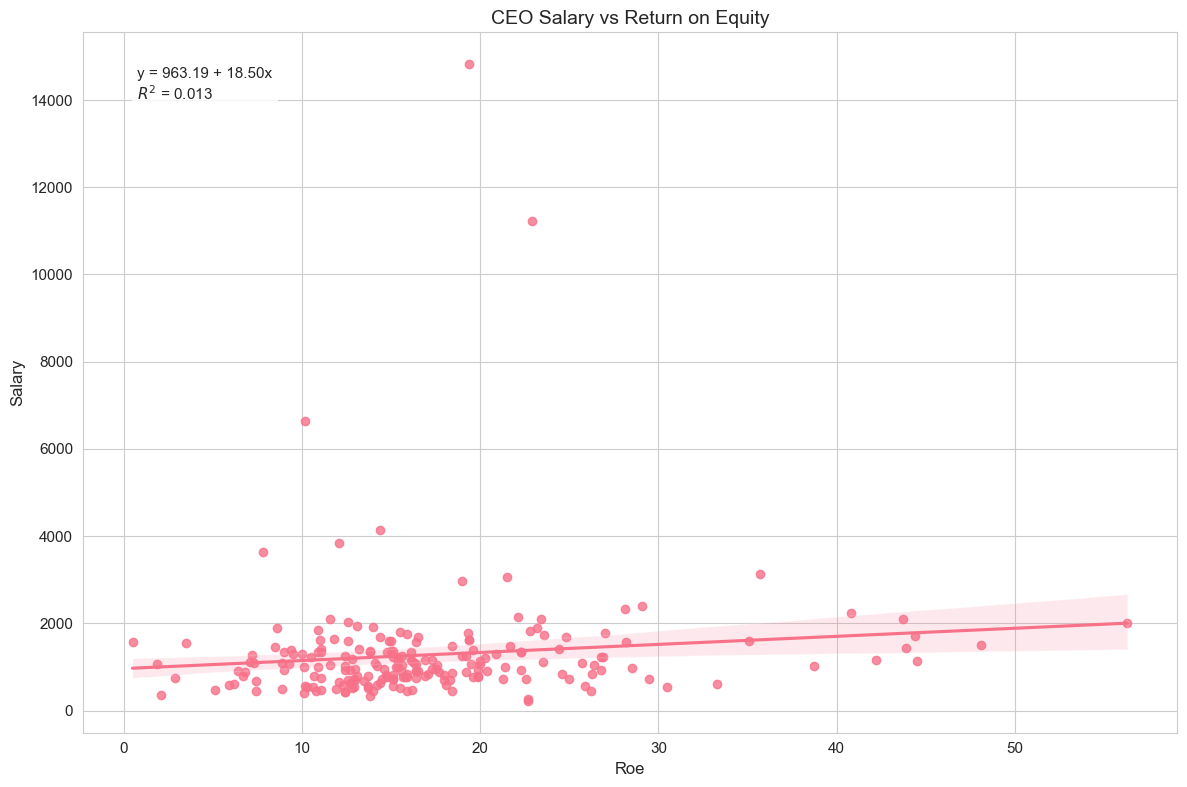

In [5]:
# Create enhanced regression plot for CEO Salary vs ROE
plot_regression("roe", "salary", ceosal1, results, "CEO Salary vs Return on Equity")

Running this code will generate a scatter plot with 'roe' on the x-axis and 'salary' on the y-axis, along with the OLS regression line and its 95% confidence interval. The plot also displays the estimated regression equation and the R-squared value.

:::{note} Interpretation of Example 2.3
:class: dropdown

Looking at the output and the plot, we can interpret the results. The estimated regression equation (visible on the plot) will be something like:

$$ \widehat{\text{salary}} = \hat{\beta}_0 + \hat{\beta}_1 \text{roe} $$

We find $\hat{\beta}_1 = 18.50$. This means that, on average, for every one percentage point increase in ROE, CEO salary is predicted to increase by approximately \$18,500 (since salary is in thousands of dollars). The intercept, $\hat{\beta}_0 = 963.19$, represents the predicted salary when ROE is zero.  The R-squared value (also on the plot) is 0.013, indicating that only about 1.3% of the variation in CEO salaries is explained by ROE in this simple linear model. This suggests that ROE alone is not a strong predictor of CEO salary, and other factors are likely more important.
:::

### Example 2.4: Wage and Education

Let's consider another example, examining the relationship between hourly wages and years of education. We use the `wage1` dataset and the following model:

$$\text{wage} = \beta_0 + \beta_1 \text{educ} + u$$

Here, `wage` is the hourly wage (in dollars), and `educ` is years of education. We expect a positive relationship, i.e., $\beta_1 > 0$, as more education is generally believed to lead to higher wages.

In [6]:
# Load and analyze wage data
wage1 = wool.data("wage1")  # Load the wage1 dataset

# Fit regression model
reg = smf.ols(formula="wage ~ educ", data=wage1)  # Define and fit the OLS model
results = reg.fit()  # Fit the model

# Display regression results using DataFrame
wage_results = pd.DataFrame(
    {
        "Parameter": [
            "Intercept ($\\beta_0$)",
            "Education coefficient ($\\beta_1$)",
            "R-squared",
        ],
        "Value": [results.params.iloc[0], results.params.iloc[1], results.rsquared],
        "Formatted": [
            f"{results.params.iloc[0]:.2f}",
            f"{results.params.iloc[1]:.2f}",
            f"{results.rsquared:.3f}",
        ],
    },
)
wage_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),-0.90
1,Education coefficient ($\beta_1$),0.54
2,R-squared,0.165


This code loads the `wage1` dataset, fits the regression model of `wage` on `educ` using `statsmodels`, and then shows the estimated coefficients and R-squared.

:::{note} Interpretation of Example 2.4
:class: dropdown

We find $\hat{\beta}_1 = 0.54$. This implies that, on average, each additional year of education is associated with an increase in hourly wage of approximately \$0.54. The intercept, $\hat{\beta}_0 = -0.90$, represents the predicted wage for someone with zero years of education. The R-squared is 0.165, meaning that about 16.5% of the variation in hourly wages is explained by years of education in this simple model. Education appears to be a somewhat more important factor in explaining wages than ROE was for CEO salaries, but still, a large portion of wage variation remains unexplained by education alone.
:::

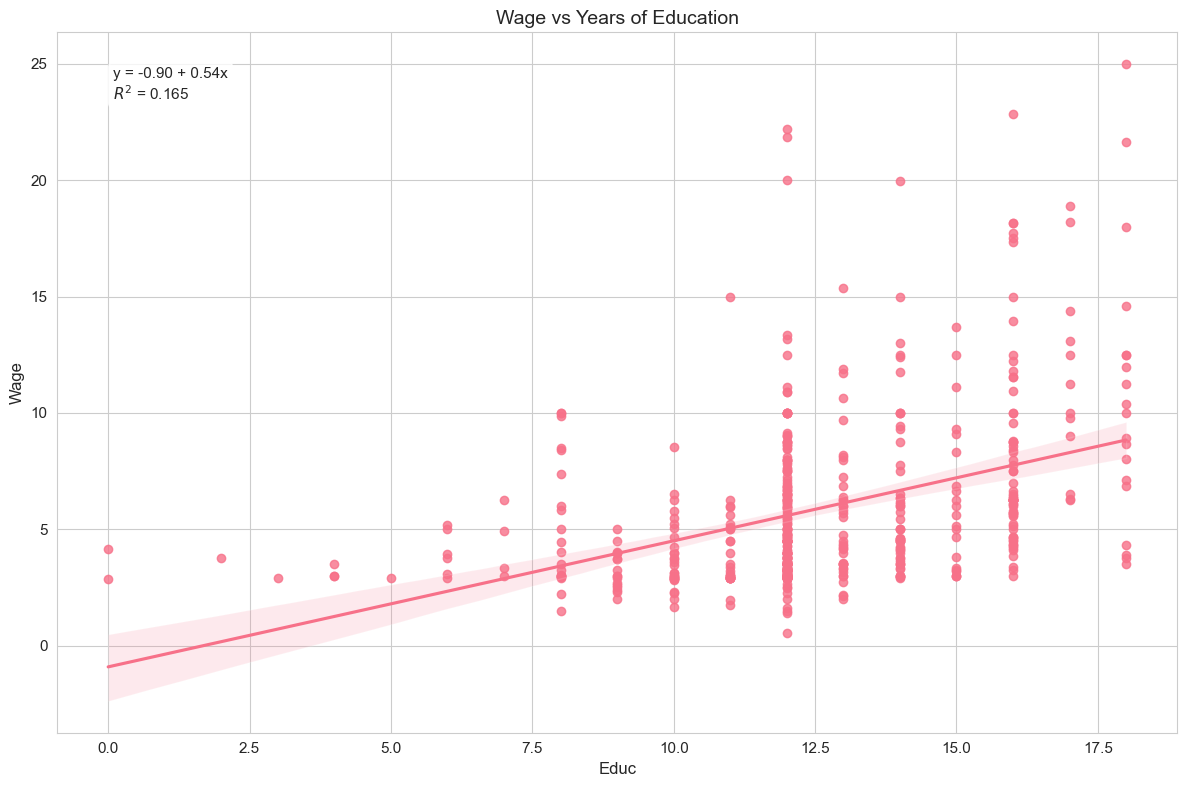

In [7]:
# Create visualization
plot_regression(
    "educ",
    "wage",
    wage1,
    results,
    "Wage vs Years of Education",
)  # Generate regression plot

The regression plot visualizes the relationship between years of education and hourly wage, showing the fitted regression line along with the data points and confidence interval.

### Example 2.5: Voting Outcomes and Campaign Expenditures

In this example, we explore the relationship between campaign spending and voting outcomes. We use the `vote1` dataset and the model:

$$ \text{voteA} = \beta_0 + \beta_1 \text{shareA} + u $$

Here, `voteA` is the percentage of votes received by candidate A, and `shareA` is the percentage of campaign spending by candidate A out of the total spending by both candidates. We expect that higher campaign spending share for candidate A will lead to a higher vote share, so we anticipate $\beta_1 > 0$.

In [8]:
# Load and analyze voting data
vote1 = wool.data("vote1")  # Load the vote1 dataset

# Fit regression model
reg = smf.ols(formula="voteA ~ shareA", data=vote1)  # Define and fit the OLS model
results = reg.fit()  # Fit the model

# Display regression results using DataFrame
vote_results = pd.DataFrame(
    {
        "Parameter": [
            "Intercept ($\\beta_0$)",
            "Share coefficient ($\\beta_1$)",
            "R-squared",
        ],
        "Value": [results.params.iloc[0], results.params.iloc[1], results.rsquared],
        "Formatted": [
            f"{results.params.iloc[0]:.2f}",
            f"{results.params.iloc[1]:.2f}",
            f"{results.rsquared:.3f}",
        ],
    },
)
vote_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),26.81
1,Share coefficient ($\beta_1$),0.46
2,R-squared,0.856


This code loads the `vote1` dataset, fits the regression model using `statsmodels`, and shows the estimated coefficients and R-squared.

:::{note} Interpretation of Example 2.5
:class: dropdown

We find $\hat{\beta}_1 = 0.46$. This suggests that for every one percentage point increase in candidate A's share of campaign spending, candidate A's vote share is predicted to increase by approximately 0.46 percentage points. The intercept, $\hat{\beta}_0 = 26.81$, represents the predicted vote share for candidate A if their campaign spending share is zero. The R-squared is 0.856, which is quite high! It indicates that about 85.6% of the variation in candidate A's vote share is explained by their share of campaign spending in this simple model. This suggests that campaign spending share is a very strong predictor of voting outcomes, at least in this dataset.
:::

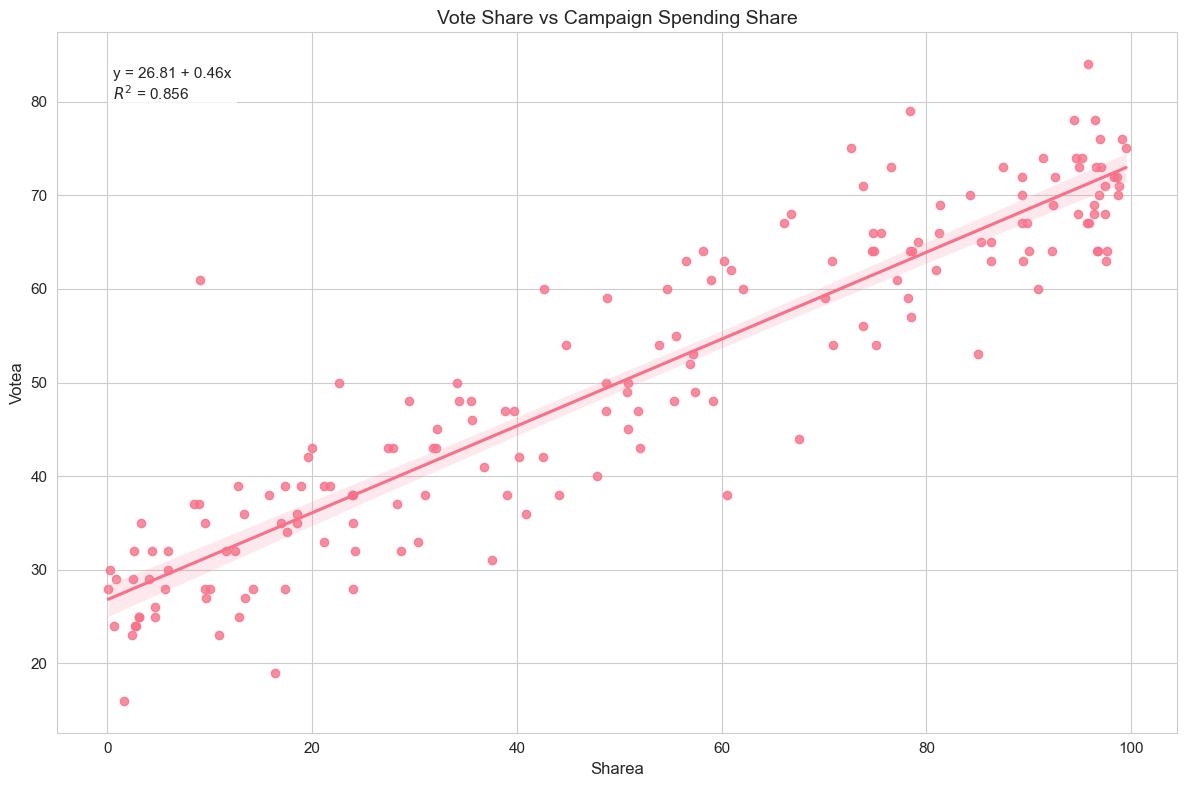

In [9]:
# Create visualization
plot_regression(
    "shareA",
    "voteA",
    vote1,
    results,
    "Vote Share vs Campaign Spending Share",
)  # Generate regression plot

The regression plot demonstrates the strong linear relationship between campaign spending share and vote share, with most data points closely following the fitted line.

## 2.2. Coefficients, Fitted Values, and Residuals

As we discussed earlier, after estimating the OLS regression, we obtain fitted values ($\hat{y}_i$) and residuals ($\hat{u}_i$). Let's formally define them again:

**Fitted Values**: These are the predicted values of $y$ for each observation $i$, calculated using the estimated regression equation:

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$

Fitted values lie on the OLS regression line. For each $x_i$, $\hat{y}_i$ is the point on the line directly above or below $x_i$.

**Residuals**: These are the differences between the actual values of $y_i$ and the fitted values $\hat{y}_i$. They represent the unexplained part of $y_i$ for each observation:

$$\hat{u}_i = y_i - \hat{y}_i$$

Residuals are estimates of the unobservable error terms $u_i$. In OLS regression, we aim to minimize the sum of squared residuals.

### Example 2.6: CEO Salary and Return on Equity

Let's go back to the CEO salary and ROE example and examine the fitted values and residuals. We will calculate these and present the first 15 observations in a table. We will also create a residual plot to visualize the residuals.

In [10]:
# Prepare regression results - Re-run the regression for ceosal1 dataset
ceosal1 = wool.data("ceosal1")  # Load data again (if needed)
reg = smf.ols(formula="salary ~ roe", data=ceosal1)  # Define the regression model
results = reg.fit()  # Fit the model

# Calculate fitted values and residuals
salary_hat = results.fittedvalues  # Get fitted values from results object
u_hat = results.resid  # Get residuals from results object

# Create summary table
table = pd.DataFrame(  # Create a Pandas DataFrame
    {
        "ROE": ceosal1["roe"],  # Include ROE values
        "Actual Salary": ceosal1["salary"],  # Include actual salary values
        "Predicted Salary": salary_hat,  # Include fitted salary values
        "Residual": u_hat,  # Include residual values
    },
)

# Format and display the first 15 rows
pd.set_option(
    "display.float_format",
    lambda x: "%.2f" % x,
)  # Set float format for display
table.head(15)  # Display the first 15 rows of the table

,ROE,Actual Salary,Predicted Salary,Residual
0,14.10,1095,1224.06,-129.06
1,10.90,1001,1164.85,-163.85
2,23.50,1122,1397.97,-275.97
3,5.90,578,1072.35,-494.35
4,13.80,1368,1218.51,149.49
5,20.00,1145,1333.22,-188.22
6,16.40,1078,1266.61,-188.61
7,16.30,1094,1264.76,-170.76
8,10.50,1237,1157.45,79.55
9,26.30,833,1449.77,-616.77


This code calculates the fitted values and residuals, then creates and displays a summary table showing ROE, actual salary, predicted salary, and residuals for the first 15 observations.

:::{note} Interpretation of Example 2.6
:class: dropdown

By examining the table, you can see for each company the actual CEO salary, the salary predicted by the regression model based on ROE, and the residual, which is the difference between the actual and predicted salary. A positive residual means the actual salary is higher than predicted, and a negative residual means it's lower.
:::

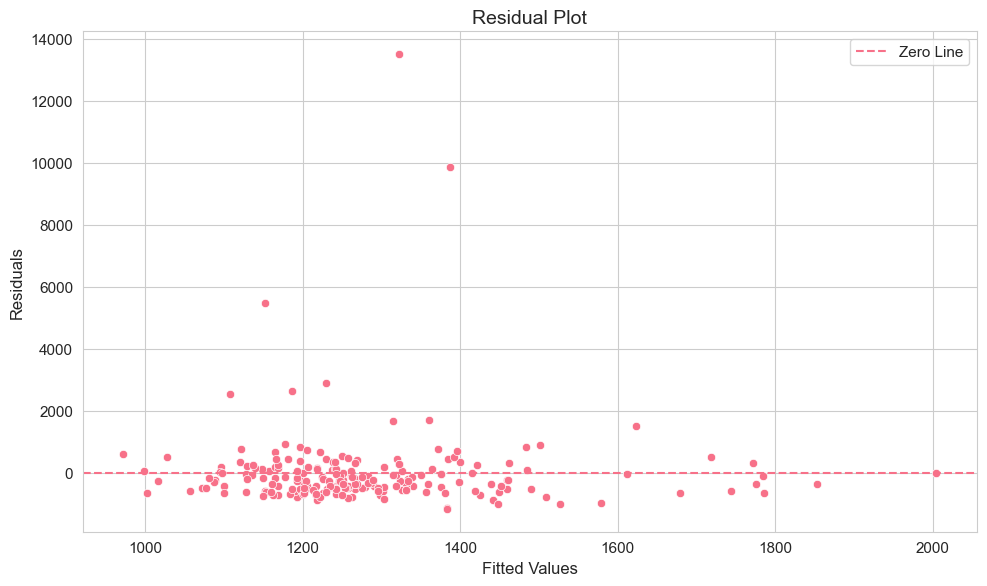

In [11]:
# Create residual plot with seaborn defaults
fig, ax = plt.subplots(figsize=(10, 6))

# Simple, clean scatter plot
sns.scatterplot(x=salary_hat, y=u_hat, ax=ax)

# Add reference line
ax.axhline(y=0, linestyle="--", label="Zero Line")

# Clean titles and labels
ax.set_title("Residual Plot")
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.legend()

plt.tight_layout()

The residual plot is useful for checking assumptions of OLS regression, particularly homoscedasticity (constant variance of errors). Ideally, residuals should be randomly scattered around zero with no systematic pattern. Look for patterns where the spread of residuals changes with fitted values, which could indicate heteroscedasticity.

### Example 2.7: Wage and Education

Let's verify some important properties of OLS residuals using the wage and education example. These properties are mathematical consequences of the OLS minimization process:

1. **The sum of residuals is zero**: $\sum_{i=1}^n \hat{u}_i = 0$. This implies that the mean of residuals is also zero: $\frac{1}{n}\sum_{i=1}^n \hat{u}_i = 0$.
2. **The sample covariance between regressors and residuals is zero**: $\sum_{i=1}^n x_i \hat{u}_i = 0$. This means that the residuals are uncorrelated with the independent variable $x$.
3. **The point $(\bar{x}, \bar{y})$ lies on the regression line**: This is ensured by the formula for $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$.

Let's check these properties using the `wage1` dataset.

In [12]:
# Load and prepare data - Re-run the regression for wage1 dataset
wage1 = wool.data("wage1")  # Load wage1 data
reg = smf.ols(formula="wage ~ educ", data=wage1)  # Define regression model
results = reg.fit()  # Fit the model

# Get coefficients, fitted values and residuals
b = results.params  # Extract coefficients
wage_hat = results.fittedvalues  # Extract fitted values
u_hat = results.resid  # Extract residuals

# Property 1: Mean of residuals should be zero
u_hat_mean = np.mean(u_hat)  # Calculate the mean of residuals

# Property 2: Covariance between education and residuals should be zero
educ_u_cov = np.cov(wage1["educ"], u_hat)[
    1,
    0,
]  # Calculate covariance between educ and residuals

# Property 3: Point (x_mean, y_mean) lies on regression line
educ_mean = np.mean(wage1["educ"])  # Calculate mean of education
wage_mean = np.mean(wage1["wage"])  # Calculate mean of wage
wage_pred = (
    b.iloc[0] + b.iloc[1] * educ_mean
)  # Predict wage at mean education using regression line

# Display regression properties
properties_data = pd.DataFrame(
    {
        "Property": [
            "Mean of residuals",
            "Covariance between education and residuals",
            "Mean wage",
            "Predicted wage at mean education",
        ],
        "Value": [u_hat_mean, educ_u_cov, wage_mean, wage_pred],
        "Formatted": [
            f"{u_hat_mean:.10f}",
            f"{educ_u_cov:.10f}",
            f"{wage_mean:.6f}",
            f"{wage_pred:.6f}",
        ],
    },
)
properties_data[["Property", "Formatted"]]

,Property,Formatted
0,Mean of residuals,-0.0000000000
1,Covariance between education and residuals,0.0000000000
2,Mean wage,5.896103
3,Predicted wage at mean education,5.896103


This code calculates the mean of the residuals, the covariance between education and residuals, and verifies that the predicted wage at the mean level of education is equal to the mean wage.

:::{note} Interpretation of Example 2.7
:class: dropdown

The output should show that the mean of residuals is very close to zero (practically zero, given potential floating-point inaccuracies). Similarly, the covariance between education and residuals should be very close to zero. Finally, the predicted wage at the average level of education should be very close to the average wage. These results confirm the mathematical properties of OLS residuals. These properties are not assumptions, but rather outcomes of the OLS estimation procedure.
:::

## 2.3. Goodness of Fit

After fitting a regression model, it's important to assess how well the model fits the data. A key measure of goodness of fit in simple linear regression is the R-squared ($R^2$) statistic. R-squared measures the proportion of the total variation in the dependent variable ($y$) that is explained by the independent variable ($x$) in our model.

To understand R-squared, we first need to define three sums of squares:

**Total Sum of Squares (SST)**: This measures the total sample variation in $y$. It is the sum of squared deviations of $y_i$ from its mean $\bar{y}$:

$$\text{SST} = \sum_{i=1}^n (y_i - \bar{y})^2 = (n-1) \widehat{\text{Var}}(y)$$

where $\widehat{\text{Var}}(y) = \frac{1}{n-1}\sum_{i=1}^n (y_i - \bar{y})^2$ is the sample variance of $y$. SST represents the total variability in the dependent variable that we want to explain.

**Explained Sum of Squares (SSE)**: This measures the variation in $\hat{y}$ predicted by our model. It is the sum of squared deviations of the fitted values $\hat{y}_i$ from the mean of $y$, $\bar{y}$:

$$\text{SSE} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 = (n-1) \widehat{\text{Var}}(\hat{y})$$

where $\widehat{\text{Var}}(\hat{y}) = \frac{1}{n-1}\sum_{i=1}^n (\hat{y}_i - \bar{y})^2$ is the sample variance of the fitted values. SSE represents the variability in $y$ that is explained by our model.

**Residual Sum of Squares (SSR)**: This measures the variation in the residuals $\hat{u}_i$, which is the unexplained variation in $y$. It is the sum of squared residuals:

$$\text{SSR} = \sum_{i=1}^n \hat{u}_i^2 = (n-1) \widehat{\text{Var}}(\hat{u})$$

where $\widehat{\text{Var}}(\hat{u}) = \frac{1}{n-1}\sum_{i=1}^n \hat{u}_i^2$ is the sample variance of residuals. Note that the mean of OLS residuals is always zero ($\bar{\hat{u}} = 0$), so we are summing squared deviations from zero. SSR represents the variability in $y$ that is *not* explained by our model.

These three sums of squares are related by the following identity:

$$\text{SST} = \text{SSE} + \text{SSR}$$

This equation states that the total variation in $y$ can be decomposed into the variation explained by the model (SSE) and the unexplained variation (SSR).

Now we can define R-squared:

$$R^2 = \frac{\text{SSE}}{\text{SST}} = 1 - \frac{\text{SSR}}{\text{SST}} = \frac{\widehat{\text{Var}}(\hat{y})}{\widehat{\text{Var}}(y)} = 1 - \frac{\widehat{\text{Var}}(\hat{u})}{\widehat{\text{Var}}(y)}$$

R-squared is the ratio of the explained variation to the total variation. It ranges from 0 to 1 (or 0% to 100%).

- $R^2 = 0$ means the model explains none of the variation in $y$. In this case, SSE = 0 and SSR = SST.
- $R^2 = 1$ means the model explains all of the variation in $y$. In this case, SSR = 0 and SSE = SST.

A higher R-squared generally indicates a better fit, but it's important to remember that a high R-squared does not necessarily mean that the model is good or that there is a causal relationship. R-squared only measures the strength of the linear relationship and the proportion of variance explained.

### Example 2.8: CEO Salary and Return on Equity

Let's calculate and compare R-squared for the CEO salary and ROE example using different formulas. We will also create visualizations to understand the concept of goodness of fit.

In [13]:
# Load and prepare data - Re-run regression for ceosal1
ceosal1 = wool.data("ceosal1")  # Load data
reg = smf.ols(formula="salary ~ roe", data=ceosal1)  # Define regression model
results = reg.fit()  # Fit the model

# Calculate predicted values & residuals
sal_hat = results.fittedvalues  # Get fitted values
u_hat = results.resid  # Get residuals
sal = ceosal1["salary"]  # Get actual salary values

# Calculate $R^2$ in three different ways - Using different formulas for R-squared
R2_a = np.var(sal_hat, ddof=1) / np.var(sal, ddof=1)  # $R^2$ = var(y_hat)/var(y)
R2_b = 1 - np.var(u_hat, ddof=1) / np.var(sal, ddof=1)  # $R^2$ = 1 - var(u_hat)/var(y)
R2_c = np.corrcoef(sal, sal_hat)[1, 0] ** 2  # $R^2$ = correlation(y, y_hat)^2

# Display R-squared calculations
r_squared_data = pd.DataFrame(
    {
        "Method": [
            "Using var($\\hat{y}$)/var(y)",
            "Using 1 - var($\\hat{u}$)/var(y)",
            "Using correlation coefficient",
        ],
        "Formula": [
            "var($\\hat{y}$)/var(y)",
            "1 - var($\\hat{u}$)/var(y)",
            "corr(y, $\\hat{y}$)^2",
        ],
        "R-squared": [R2_a, R2_b, R2_c],
        "Formatted": [f"{R2_a:.4f}", f"{R2_b:.4f}", f"{R2_c:.4f}"],
    },
)
r_squared_data[["Method", "Formatted"]]

,Method,Formatted
0,Using var($\hat{y}$)/var(y),0.0132
1,Using 1 - var($\hat{u}$)/var(y),0.0132
2,Using correlation coefficient,0.0132


This code calculates R-squared using three different formulas to demonstrate their equivalence. All three methods should yield the same R-squared value (within rounding errors).

:::{note} Interpretation of Example 2.8
:class: dropdown

The R-squared value calculated (around 0.013 in our example) will be the same regardless of which formula is used, confirming their equivalence. This low R-squared indicates that ROE explains very little of the variation in CEO salaries.
:::

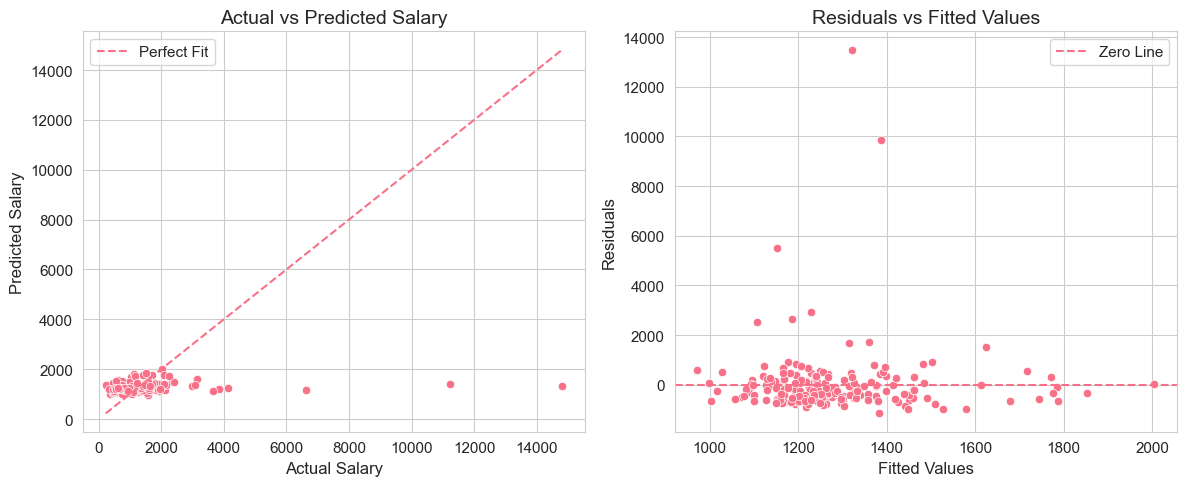

In [14]:
# Create model fit visualization with seaborn defaults
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Actual vs Predicted plot
sns.scatterplot(x=sal, y=sal_hat, ax=axes[0])
axes[0].plot([sal.min(), sal.max()], [sal.min(), sal.max()], "--", label="Perfect Fit")
axes[0].set_title("Actual vs Predicted Salary")
axes[0].set_xlabel("Actual Salary")
axes[0].set_ylabel("Predicted Salary")
axes[0].legend()

# Residuals vs Fitted plot
sns.scatterplot(x=sal_hat, y=u_hat, ax=axes[1])
axes[1].axhline(y=0, linestyle="--", label="Zero Line")
axes[1].set_title("Residuals vs Fitted Values")
axes[1].set_xlabel("Fitted Values")
axes[1].set_ylabel("Residuals")
axes[1].legend()

plt.tight_layout()

These two plots provide visual assessments of model fit:

1. **Actual vs Predicted Plot**: Shows how well predicted salaries align with actual salaries. If the model fit were perfect ($R^2$ = 1), all points would lie on the 45-degree dashed red line.
2. **Residuals vs Fitted Values Plot**: Helps assess homoscedasticity and model adequacy. Ideally, residuals should be randomly scattered around zero with no discernible pattern.

### Example 2.9: Voting Outcomes and Campaign Expenditures

Let's examine the complete regression summary for the voting outcomes and campaign expenditures example, including R-squared and other statistical measures. We will also create an enhanced visualization with a 95% confidence interval.

,Metric,Formatted
0,R-squared,0.8561
1,Adjusted R-squared,0.8553
2,F-statistic,1017.66
3,Number of observations,173


<Figure size 1000x600 with 0 Axes>

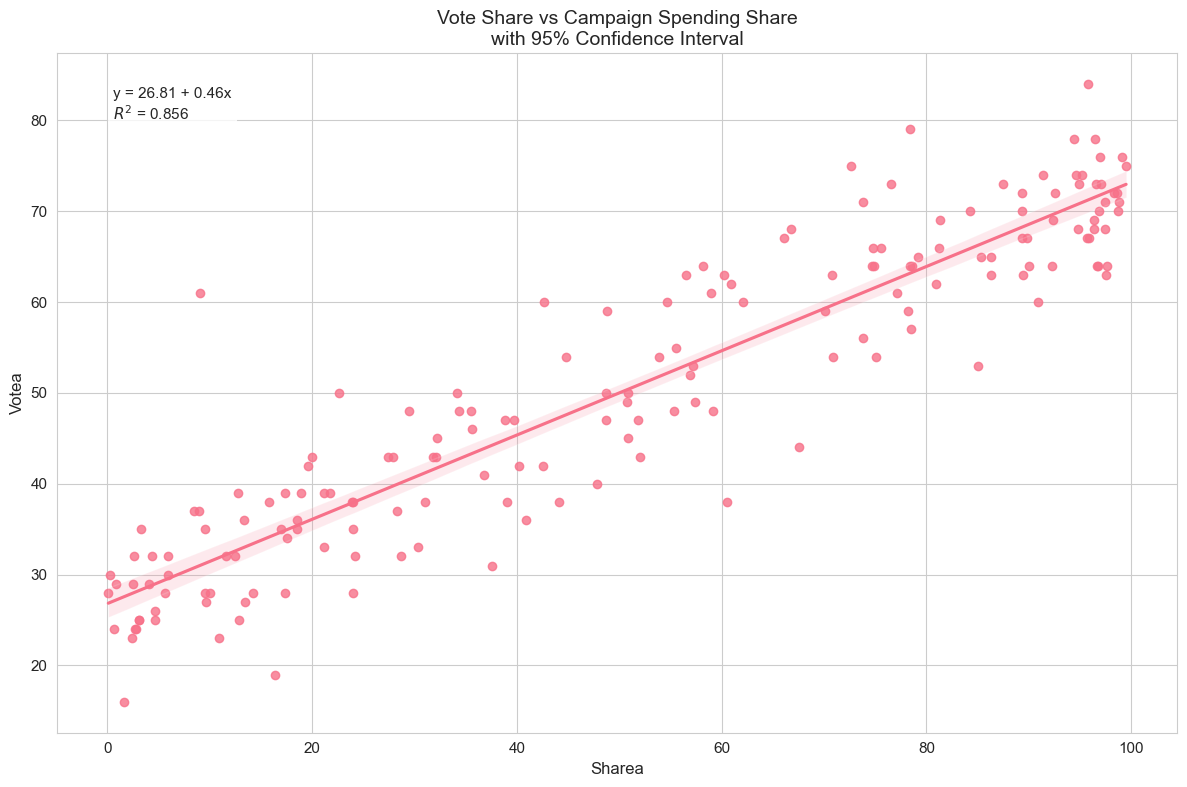

In [15]:
# Load and analyze voting data - Re-run regression for vote1 dataset
vote1 = wool.data("vote1")  # Load data

# Fit regression model
reg = smf.ols(formula="voteA ~ shareA", data=vote1)  # Define model
results = reg.fit()  # Fit model

# Create a clean summary table - Extract key statistics from results object
summary_stats = pd.DataFrame(  # Create a DataFrame for summary statistics
    {
        "Coefficient": results.params,  # Estimated coefficients
        "Std. Error": results.bse,  # Standard errors of coefficients
        "t-value": results.tvalues,  # t-statistics for coefficients
        "p-value": results.pvalues,  # p-values for coefficients
    },
)

# Display regression summary
summary_metrics = pd.DataFrame(
    {
        "Metric": [
            "R-squared",
            "Adjusted R-squared",
            "F-statistic",
            "Number of observations",
        ],
        "Value": [
            results.rsquared,
            results.rsquared_adj,
            results.fvalue,
            int(results.nobs),
        ],
        "Formatted": [
            f"{results.rsquared:.4f}",
            f"{results.rsquared_adj:.4f}",
            f"{results.fvalue:.2f}",
            f"{int(results.nobs)}",
        ],
    },
)
display(summary_metrics[["Metric", "Formatted"]])

summary_stats.round(4)  # Display summary statistics table, rounded to 4 decimal places

# Create enhanced visualization - Regression plot with confidence interval
plt.figure(figsize=(10, 6))
plot_regression(
    "shareA",
    "voteA",
    vote1,
    results,
    "Vote Share vs Campaign Spending Share\nwith 95% Confidence Interval",  # Title with CI mention
)

This code fits the regression model for voting outcomes and campaign spending share. It then creates a summary table containing coefficient estimates, standard errors, t-values, and p-values. It shows this summary, along with R-squared, adjusted R-squared, F-statistic, and the number of observations. Finally, it generates an enhanced regression plot, including a 95% confidence interval, using our `plot_regression` function.

:::{note} Interpretation of Example 2.9
:class: dropdown

The output will provide a comprehensive summary of the regression results. You can see the estimated coefficients for the intercept and `shareA`, their standard errors, t-values, and p-values. The p-values are used for hypothesis testing (we will discuss this in detail in later chapters). The R-squared and Adjusted R-squared values indicate the goodness of fit. Adjusted R-squared is a modified version of R-squared that adjusts for the number of regressors in the model (it is more relevant in multiple regression). The F-statistic is used for testing the overall significance of the regression model.

The enhanced regression plot visually represents the relationship between `shareA` and `voteA`, along with the 95% confidence interval around the regression line, providing a visual sense of the uncertainty in our predictions.
:::

## 2.4 Nonlinearities

So far, we have focused on linear relationships between variables. However, in many cases, the relationship between the dependent and independent variables might be nonlinear. We can still use linear regression techniques to model certain types of nonlinear relationships by transforming the variables. Common transformations include using logarithms of variables. Let's consider three common models involving logarithms:

1. **Log-Level Model**: In this model, the dependent variable is in logarithm form, while the independent variable is in level form:

   $$\log(y) = \beta_0 + \beta_1 x + u$$

   In this model, $\beta_1$ represents the approximate percentage change in $y$ for a one-unit change in $x$. Specifically, a one-unit increase in $x$ is associated with approximately a $100 \cdot \beta_1$ percent change in $y$. This approximation is most accurate when $|\beta_1|$ is small (typically $|\beta_1| < 0.1$). The exact percentage change is $100 \cdot [\exp(\beta_1) - 1]$ percent.

2. **Level-Log Model**: Here, the dependent variable is in level form, and the independent variable is in logarithm form:

   $$y = \beta_0 + \beta_1 \log(x) + u$$

   In this model, $\beta_1$ represents the approximate change in $y$ for a one-percent increase in $x$. Specifically, a one-percent increase in $x$ (i.e., from $x$ to $1.01x$) is associated with approximately a change in $y$ of $\beta_1/100$ units. Equivalently, a 100 percent increase in $x$ (i.e., doubling from $x$ to $2x$) is associated with a change in $y$ of approximately $\beta_1 \cdot \log(2) \approx 0.69\beta_1$ units.

3. **Log-Log Model**: In this model, both the dependent and independent variables are in logarithm form:

   $$\log(y) = \beta_0 + \beta_1 \log(x) + u$$

   In the log-log model, $\beta_1$ is interpreted as the **elasticity** of $y$ with respect to $x$. That is, a one-percent increase in $x$ is associated with approximately a $\beta_1$ percent change in $y$. This interpretation is exact (not an approximation) because $\frac{d \log(y)}{d \log(x)} = \frac{dy/y}{dx/x} = \beta_1$, which is the definition of elasticity.

### Example 2.10: Wage and Education (Log-Level Model)

Let's revisit the wage and education example and estimate a log-level model:

$$\log(\text{wage}) = \beta_0 + \beta_1 \text{educ} + u$$

In this model, we are interested in the percentage increase in wage for each additional year of education.

In [16]:
# Load and prepare data - Re-use wage1 dataset
wage1 = wool.data("wage1")  # Load data (if needed)

# Estimate log-level model - Define and fit the model with log(wage) as dependent variable
reg = smf.ols(
    formula="np.log(wage) ~ educ",
    data=wage1,
)  # Use np.log() to take logarithm of wage
results = reg.fit()  # Fit the model

# Display Log-Level Model results
log_level_results = pd.DataFrame(
    {
        "Parameter": [
            "Intercept ($\\beta_0$)",
            "Education coefficient ($\\beta_1$)",
            "R-squared",
        ],
        "Value": [results.params.iloc[0], results.params.iloc[1], results.rsquared],
        "Formatted": [
            f"{results.params.iloc[0]:.4f}",
            f"{results.params.iloc[1]:.4f}",
            f"{results.rsquared:.4f}",
        ],
    },
)
log_level_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),0.5838
1,Education coefficient ($\beta_1$),0.0827
2,R-squared,0.1858


This code estimates the log-level model using `statsmodels` with `np.log(wage)` as the dependent variable and shows the estimated coefficients and R-squared.

:::{note} Interpretation of Example 2.10
:class: dropdown

We find $\hat{\beta}_1 = 0.0827$. In the log-level model, this coefficient can be interpreted as the approximate percentage change in wage for a one-unit increase in education. So, approximately, each additional year of education is associated with an 8.27% increase in hourly wage. The intercept $\hat{\beta}_0 = 0.5838$ represents the predicted log(wage) when education is zero. The R-squared value is 0.1858, indicating the proportion of variation in $\log(\text{wage})$ explained by education.
:::

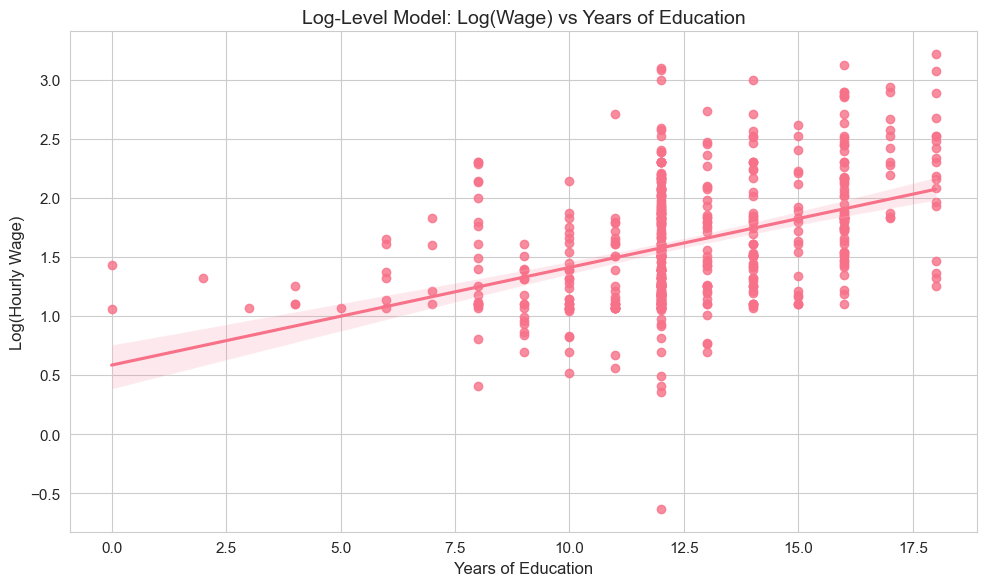

In [17]:
# Create log-level visualization with seaborn defaults
fig, ax = plt.subplots(figsize=(10, 6))

# Simple, elegant regression plot
sns.regplot(
    data=wage1,
    x="educ",
    y=np.log(wage1["wage"]),
    ax=ax,
)

# Clean titles and labels
ax.set_title("Log-Level Model: Log(Wage) vs Years of Education")
ax.set_xlabel("Years of Education")
ax.set_ylabel("Log(Hourly Wage)")

plt.tight_layout()

The scatter plot visualizes the log-level relationship, showing how log(wage) varies with years of education, along with the fitted regression line.

### Example 2.11: CEO Salary and Firm Sales (Log-Log Model)

Let's consider the CEO salary and firm sales relationship and estimate a log-log model:

$$\log(\text{salary}) = \beta_0 + \beta_1 \log(\text{sales}) + u$$

In this model, $\beta_1$ represents the elasticity of CEO salary with respect to firm sales.

In [18]:
# Load and prepare data - Re-use ceosal1 dataset
ceosal1 = wool.data("ceosal1")  # Load data (if needed)

# Estimate log-log model - Define and fit model with log(salary) and log(sales)
reg = smf.ols(
    formula="np.log(salary) ~ np.log(sales)",
    data=ceosal1,
)  # Use np.log() for both salary and sales
results = reg.fit()  # Fit the model

# Display Log-Log Model results
log_log_results = pd.DataFrame(
    {
        "Parameter": [
            "Intercept ($\\beta_0$)",
            "Sales elasticity ($\\beta_1$)",
            "R-squared",
        ],
        "Value": [results.params.iloc[0], results.params.iloc[1], results.rsquared],
        "Formatted": [
            f"{results.params.iloc[0]:.4f}",
            f"{results.params.iloc[1]:.4f}",
            f"{results.rsquared:.4f}",
        ],
    },
)
log_log_results[["Parameter", "Formatted"]]

,Parameter,Formatted
0,Intercept ($\beta_0$),4.8220
1,Sales elasticity ($\beta_1$),0.2567
2,R-squared,0.2108


This code estimates the log-log model using `statsmodels` with both variables in logarithmic form and shows the estimated coefficients and R-squared.

:::{note} Interpretation of Example 2.11
:class: dropdown

We find $\hat{\beta}_1 = 0.2567$. In the log-log model, this coefficient is the elasticity of salary with respect to sales. It means that a 1% increase in firm sales is associated with approximately a 0.2567% increase in CEO salary. The intercept $\hat{\beta}_0 = 4.8220$ does not have a direct practical interpretation in terms of original variables in this model, but it is needed for the regression equation. The R-squared value is 0.2108, indicating the proportion of variation in $\log(\text{salary})$ explained by $\log(\text{sales})$.
:::

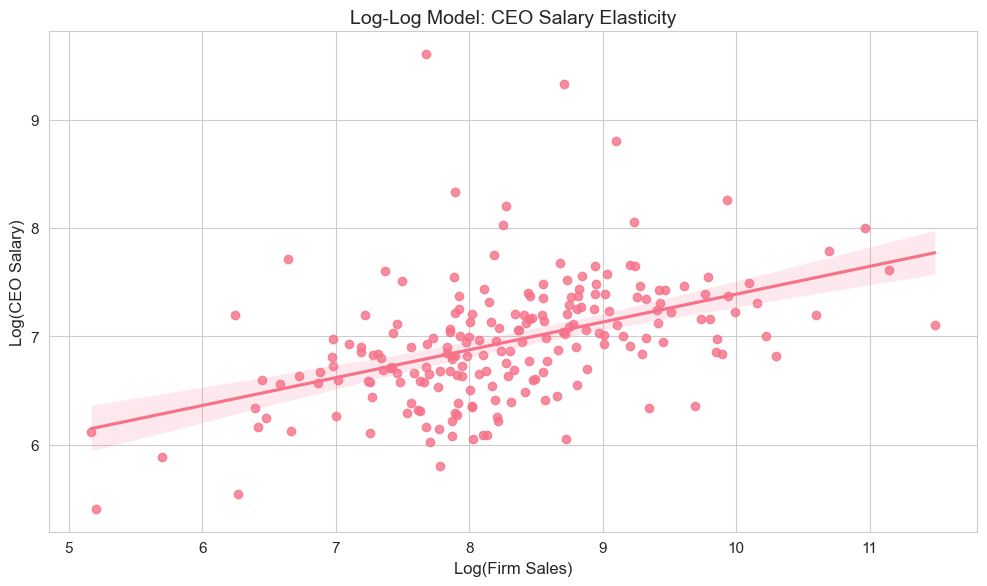

In [19]:
# Create log-log visualization with seaborn defaults
fig, ax = plt.subplots(figsize=(10, 6))

# Simple, elegant regression plot
sns.regplot(
    data=ceosal1,
    x=np.log(ceosal1["sales"]),
    y=np.log(ceosal1["salary"]),
    ax=ax,
)

# Clean titles and labels
ax.set_title("Log-Log Model: CEO Salary Elasticity")
ax.set_xlabel("Log(Firm Sales)")
ax.set_ylabel("Log(CEO Salary)")

plt.tight_layout()

The scatter plot visualizes the log-log relationship between firm sales and CEO salary, demonstrating the elasticity concept where both variables are on logarithmic scales.

## 2.5. Regression through the Origin and Regression on a Constant

In standard simple linear regression, we include an intercept term ($\beta_0$). However, in some cases, it might be appropriate to omit the intercept, forcing the regression line to pass through the origin (0,0). This is called **regression through the origin**. The model becomes:

$$y = \beta_1 x + u$$

In `statsmodels`, you can perform regression through the origin by including `0 +` or `- 1 +` in the formula, like `"salary ~ 0 + roe"` or `"salary ~ roe - 1"`.

Another special case is **regression on a constant only**, where we only estimate the intercept and do not include any independent variable. The model is:

$$y = \beta_0 + u$$

In this case, $\hat{\beta}_0$ is simply the sample mean of $y$, $\bar{y}$. This model essentially predicts the same value ($\bar{y}$) for all observations, regardless of any other factors. In `statsmodels`, you can specify this as `"salary ~ 1"` or `"salary ~ constant"`.

Let's compare these three regression specifications using the CEO salary and ROE example.

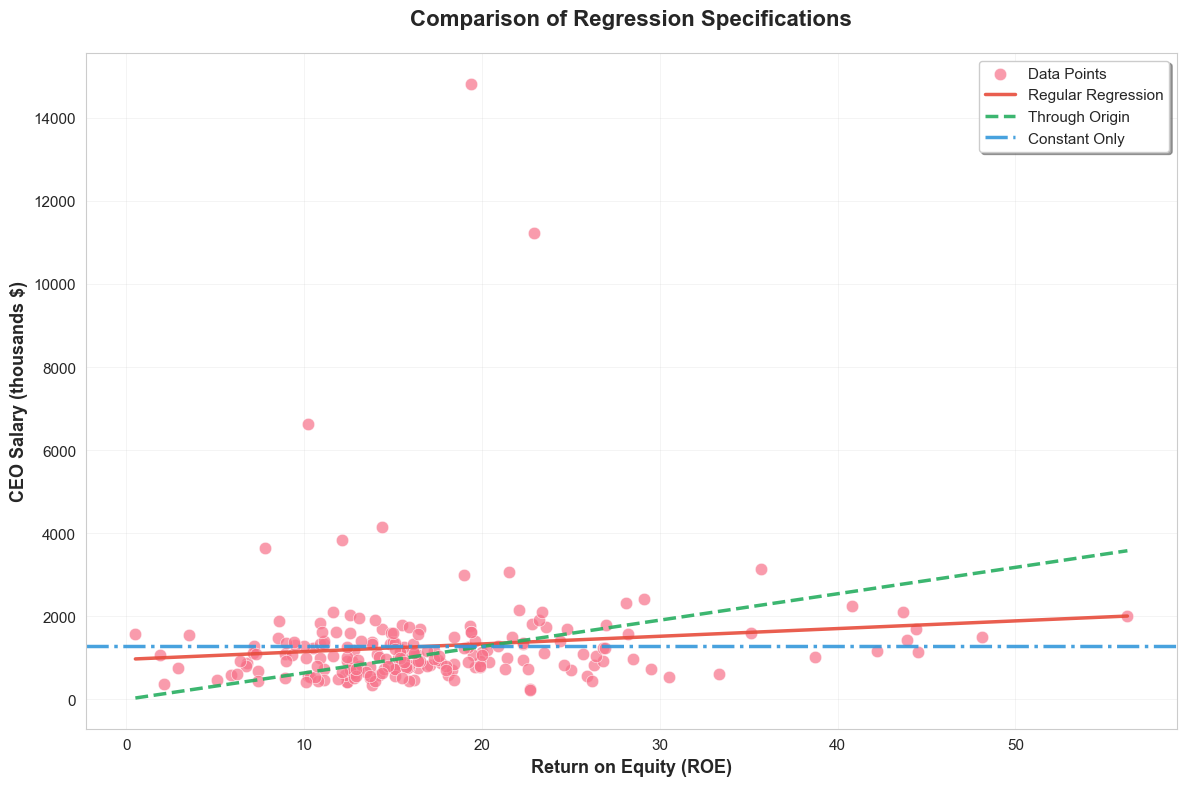

In [20]:
# Load and prepare data - Re-use ceosal1 dataset
ceosal1 = wool.data("ceosal1")  # Load data (if needed)

# 1. Regular OLS regression - Regression with intercept
reg1 = smf.ols(formula="salary ~ roe", data=ceosal1)  # Standard regression model
results1 = reg1.fit()  # Fit model 1

# 2. Regression through origin - Regression without intercept
reg2 = smf.ols(
    formula="salary ~ 0 + roe",
    data=ceosal1,
)  # Regression through origin (no intercept)
results2 = reg2.fit()  # Fit model 2

# 3. Regression on constant only - Regression with only intercept (mean model)
reg3 = smf.ols(formula="salary ~ 1", data=ceosal1)  # Regression on constant only
results3 = reg3.fit()  # Fit model 3

# Compare results across all three models
comparison_data = pd.DataFrame(
    {
        "Model": [
            "1. Regular regression",
            "2. Regression through origin",
            "3. Regression on constant",
        ],
        "Intercept ($\\beta_0$)": [
            f"{results1.params.iloc[0]:.2f}",
            "N/A",
            f"{results3.params.iloc[0]:.2f}",
        ],
        "Slope ($\\beta_1$)": [
            f"{results1.params.iloc[1]:.2f}",
            f"{results2.params.iloc[0]:.2f}",
            "N/A",
        ],
        "R-squared": [
            f"{results1.rsquared:.4f}",
            f"{results2.rsquared:.4f}",
            f"{results3.rsquared:.4f}",
        ],
    },
)
comparison_data

# Create regression comparison visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Enhanced scatter plot with seaborn
sns.scatterplot(
    data=ceosal1,
    x="roe",
    y="salary",
    alpha=0.7,
    s=80,
    edgecolors="white",
    linewidths=0.5,
    label="Data Points",
    ax=ax,
)

# Generate smooth x range for regression lines
x_range = np.linspace(ceosal1["roe"].min(), ceosal1["roe"].max(), 100)

# Plot regression lines with distinct, attractive colors
colors = ["#e74c3c", "#27ae60", "#3498db"]  # Red, green, blue
linestyles = ["-", "--", "-."]  # Different line styles
labels = ["Regular Regression", "Through Origin", "Constant Only"]
linewidths = [2.5, 2.5, 2.5]

# Regular regression line
ax.plot(
    x_range,
    results1.params.iloc[0] + results1.params.iloc[1] * x_range,
    color=colors[0],
    linestyle=linestyles[0],
    linewidth=linewidths[0],
    label=labels[0],
    alpha=0.9,
)

# Through origin line
ax.plot(
    x_range,
    results2.params.iloc[0] * x_range,
    color=colors[1],
    linestyle=linestyles[1],
    linewidth=linewidths[1],
    label=labels[1],
    alpha=0.9,
)

# Constant only line (horizontal)
ax.axhline(
    y=results3.params.iloc[0],
    color=colors[2],
    linestyle=linestyles[2],
    linewidth=linewidths[2],
    label=labels[2],
    alpha=0.9,
)

# Enhanced styling
ax.set_title(
    "Comparison of Regression Specifications",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
ax.set_xlabel("Return on Equity (ROE)", fontsize=13, fontweight="bold")
ax.set_ylabel("CEO Salary (thousands $)", fontsize=13, fontweight="bold")

# Enhanced legend
ax.legend(
    loc="upper right",
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=11,
)

# Enhanced grid
ax.grid(True, alpha=0.3, linestyle="-", linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()

This visualization compares three different regression specifications with distinct styling for each model type.

:::{note} Interpretation of Example 2.12
:class: dropdown

By comparing the results, you can see how the estimated coefficients and R-squared values differ across these specifications. Regression through the origin forces the line to go through (0,0), which may or may not be appropriate depending on the context. Regression on a constant simply gives you the mean of the dependent variable as the prediction and will always have an R-squared of 0 (unless variance of y is also zero, which is trivial case).

In the visualization, you can visually compare the fit of these different regression lines to the data. Notice that R-squared for regression through the origin can sometimes be higher or lower than regular OLS, and it should be interpreted cautiously as the total sum of squares is calculated differently in regression through the origin. Regression on a constant will be a horizontal line at the mean of salary.
:::

## 2.6. Expected Values, Variances, and Standard Errors

To understand the statistical properties of OLS estimators, we need to make certain assumptions about the population regression model and the data. These are known as the **Classical Linear Model (CLM) assumptions** for simple linear regression. The first five are often called **SLR assumptions**.

Here are the five key assumptions for Simple Linear Regression:

1. **SLR.1: Linear Population Regression Function**: The relationship between $y$ and $x$ in the population is linear:
   $$y = \beta_0 + \beta_1 x + u$$
   This assumes that the model is correctly specified in terms of linearity. This is a maintained assumption throughout the analysis.

2. **SLR.2: Random Sampling**: We have a random sample of size $n$, $\{(x_i, y_i): i=1, 2, ..., n\}$, from the population model.
   This assumption ensures that our sample is representative of the population we want to study and that observations are independent across $i$.

3. **SLR.3: Sample Variation in x**: There is sample variation in the independent variable $x$, i.e., $\widehat{\text{Var}}(x) > 0$, meaning not all $x_i$ values are identical.
   If there is no variation in $x$, we cannot estimate the relationship between $x$ and $y$ (the slope $\beta_1$ is not identified).

4. **SLR.4: Zero Conditional Mean**: The error term $u$ has an expected value of zero given any value of $x$:
   $$E(u|x) = 0$$
   This is the most crucial assumption for **unbiasedness** of OLS. It implies that the unobserved factors represented by $u$ are, on average, unrelated to $x$ at all values of $x$. This assumption implies $E(u) = 0$ and $\text{Cov}(x, u) = 0$. If $x$ and $u$ are correlated, OLS estimators will be **biased** and **inconsistent**.

5. **SLR.5: Homoscedasticity**: The error term $u$ has the same variance given any value of $x$:
   $$\text{Var}(u|x) = \sigma^2$$
   This assumption means that the spread of the errors is constant across all values of $x$. This assumption is required for **efficiency** (BLUE property) and for the standard formulas for OLS standard errors to be valid. If this assumption is violated (heteroscedasticity), OLS estimators remain **unbiased** and **consistent** under SLR.1-SLR.4, but they are no longer the Best Linear Unbiased Estimators (BLUE), and the usual standard errors and test statistics will be incorrect.

Under these assumptions, we have important theoretical results about the OLS estimators:

- **Theorem 2.1: Unbiasedness of OLS Estimators**: Under assumptions **SLR.1-SLR.4** (linearity, random sampling, sample variation, and zero conditional mean), the OLS estimators $\hat{\beta}_0$ and $\hat{\beta}_1$ are unbiased estimators of $\beta_0$ and $\beta_1$, respectively. That is,
  $$E(\hat{\beta}_0) = \beta_0 \quad \text{and} \quad E(\hat{\beta}_1) = \beta_1$$
  Unbiasedness means that on average, across many random samples from the same population, the OLS estimates will equal the true population parameters. Note that **SLR.5 (homoscedasticity) is not required** for unbiasedness.

- **Theorem 2.2: Variances of OLS Estimators**: Under assumptions **SLR.1-SLR.5** (including homoscedasticity), the variances of the OLS estimators conditional on the sample values of $x$ are given by:
  $$\text{Var}(\hat{\beta}_0|x_1, \ldots, x_n) = \frac{\sigma^2 \sum_{i=1}^n x_i^2}{n \sum_{i=1}^n (x_i - \bar{x})^2} = \sigma^2 \frac{\frac{1}{n}\sum_{i=1}^n x_i^2}{\text{SST}_x}$$
  $$\text{Var}(\hat{\beta}_1|x_1, \ldots, x_n) = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2} = \frac{\sigma^2}{\text{SST}_x}$$
  where $\text{SST}_x = \sum_{i=1}^n (x_i - \bar{x})^2$ is the total sum of squares for $x$, and $\sigma^2 = \text{Var}(u|x)$ is the (constant) conditional variance of the error term. These formulas show that the variance of $\hat{\beta}_1$ decreases as the sample size $n$ increases and as the variation in $x$ (measured by $\text{SST}_x$) increases.

To make these variance formulas practically useful, we need to estimate the error variance $\sigma^2$. An unbiased estimator of $\sigma^2$ is the **standard error of regression (SER)**, denoted as $\hat{\sigma}^2$:

$$\hat{\sigma}^2 = \frac{1}{n-2} \cdot \sum_{i=1}^n \hat{u}_i^2 = \frac{\text{SSR}}{n-2}$$

The denominator $n-2$ reflects the degrees of freedom, as we lose two degrees of freedom when estimating $\beta_0$ and $\beta_1$. Notice that $\hat{\sigma}^2 = \frac{n-1}{n-2} \cdot \text{var}(\hat{u}_i)$, which is a slight adjustment to the sample variance of residuals to get an unbiased estimator of $\sigma^2$.

Using $\hat{\sigma}^2$, we can estimate the standard errors of $\hat{\beta}_0$ and $\hat{\beta}_1$:

$$\text{se}(\hat{\beta}_0) = \sqrt{\widehat{\text{var}}(\hat{\beta}_0)} = \sqrt{\frac{\hat{\sigma}^2 \sum_{i=1}^n x_i^2}{n \sum_{i=1}^n (x_i - \bar{x})^2}} = \sqrt{\frac{\hat{\sigma}^2 [\frac{1}{n}\sum_{i=1}^n x_i^2]}{\text{SST}_x}}$$

$$\text{se}(\hat{\beta}_1) = \sqrt{\widehat{\text{var}}(\hat{\beta}_1)} = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}} = \sqrt{\frac{\hat{\sigma}^2}{\text{SST}_x}}$$

Standard errors measure the precision of our coefficient estimates. Smaller standard errors indicate more precise estimates. They are crucial for hypothesis testing and constructing confidence intervals (which we will cover in subsequent chapters).

### Example 2.12: Student Math Performance and the School Lunch Program

Let's consider an example using the `meap93` dataset, examining the relationship between student math performance and the percentage of students eligible for the school lunch program. The model is:

$$\text{math10} = \beta_0 + \beta_1 \text{lnchprg} + u$$

where `math10` is the percentage of students passing a math test, and `lnchprg` is the percentage of students eligible for the lunch program. We expect a negative relationship, i.e., $\beta_1 < 0$, as higher lunch program participation (indicating more poverty) might be associated with lower math scores.

,Statistic,Formatted
0,SER,9.5659
1,SE($\beta_0$),0.9976
2,SE($\beta_1$),0.0348


<Figure size 1000x600 with 0 Axes>

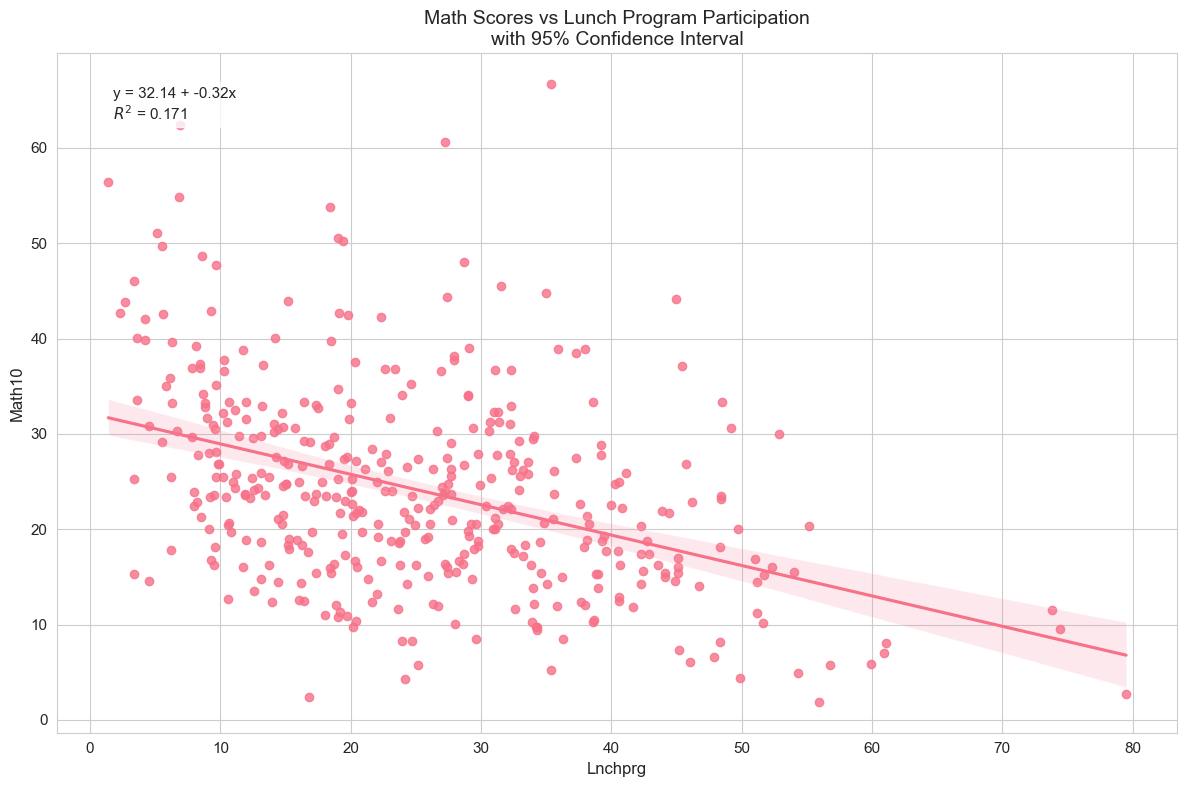

In [21]:
# Load and analyze data - Use meap93 dataset
meap93 = wool.data("meap93")  # Load data

# Estimate model - Regular OLS regression
reg = smf.ols(formula="math10 ~ lnchprg", data=meap93)  # Define model
results = reg.fit()  # Fit model

# Calculate SER manually - Calculate Standard Error of Regression manually
n = results.nobs  # Number of observations
u_hat_var = np.var(results.resid, ddof=1)  # Sample variance of residuals
SER = np.sqrt(u_hat_var * (n - 1) / (n - 2))  # Calculate SER using formula

# Calculate standard errors manually - Calculate standard errors of beta_0 and beta_1 manually
lnchprg_var = np.var(meap93["lnchprg"], ddof=1)  # Sample variance of lnchprg
lnchprg_mean = np.mean(meap93["lnchprg"])  # Mean of lnchprg
lnchprg_sq_mean = np.mean(meap93["lnchprg"] ** 2)  # Mean of squared lnchprg

se_b1 = SER / (np.sqrt(lnchprg_var) * np.sqrt(n - 1))  # Standard error of beta_1
se_b0 = se_b1 * np.sqrt(lnchprg_sq_mean)  # Standard error of beta_0

# Display manual calculations
manual_calculations = pd.DataFrame(
    {
        "Statistic": ["SER", "SE($\\beta_0$)", "SE($\\beta_1$)"],
        "Manual Calculation": [SER, se_b0, se_b1],
        "Formatted": [f"{SER:.4f}", f"{se_b0:.4f}", f"{se_b1:.4f}"],
    },
)
display(manual_calculations[["Statistic", "Formatted"]])

results.summary().tables[1]  # Display statsmodels summary table

# Create visualization with confidence intervals - Regression plot with CI
plt.figure(figsize=(10, 6))
plot_regression(
    "lnchprg",
    "math10",
    meap93,
    results,
    "Math Scores vs Lunch Program Participation\nwith 95% Confidence Interval",  # Title with CI mention
)

This code estimates the regression model, calculates the SER and standard errors of coefficients manually using the formulas, and then shows these manual calculations. It also displays the `statsmodels` regression summary table, which includes the standard errors calculated by `statsmodels` (which should match our manual calculations). Finally, it generates a regression plot with a 95% confidence interval.

:::{note} Interpretation of Example 2.12 (Standard Errors)
:class: dropdown

By comparing the manually calculated SER and standard errors with those reported in the `statsmodels` summary table, you can verify that they are consistent. The standard errors provide a measure of the uncertainty associated with our coefficient estimates. Smaller standard errors mean our estimates are more precise. The regression plot with confidence intervals visually shows the range of plausible regression lines, given the uncertainty in our estimates.
:::

## 2.7 Monte Carlo Simulations

Monte Carlo simulations are powerful tools for understanding the statistical properties of estimators, like the OLS estimators. They involve repeatedly generating random samples from a known population model, estimating the parameters using OLS in each sample, and then examining the distribution of these estimates. This helps us to empirically verify properties like unbiasedness and understand the sampling variability of estimators.

### 2.7.1. One Sample

Let's start by simulating a single sample from a population regression model. We will define a true population model, generate random data based on this model, estimate the model using OLS on this sample, and compare the estimated coefficients with the true population parameters.

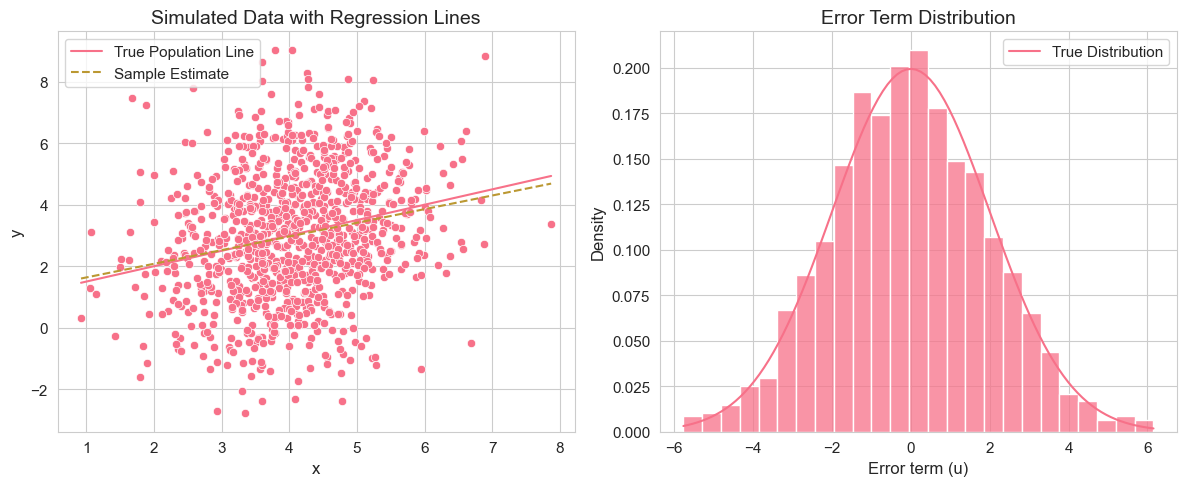

In [22]:
# Set random seed for reproducibility - Ensure consistent random number generation
np.random.seed(1234567)  # Set seed for random number generator

# Set parameters - Define true population parameters and sample size
n = 1000  # sample size
beta0 = 1  # true intercept
beta1 = 0.5  # true slope
sigma_u = 2  # standard deviation of error term

# Generate data - Simulate x, u, and y based on population model
x = stats.norm.rvs(4, 1, size=n)  # x ~ N(4, 1) - Generate x from normal distribution
u = stats.norm.rvs(
    0,
    sigma_u,
    size=n,
)  # u ~ N(0, 4) - Generate error term from normal distribution
y = (
    beta0 + beta1 * x + u
)  # population regression function - Generate y based on true model
df = pd.DataFrame({"y": y, "x": x})  # Create DataFrame

# Estimate model - Perform OLS regression on simulated data
reg = smf.ols(formula="y ~ x", data=df)  # Define OLS model
results = reg.fit()  # Fit model

# Display true vs estimated parameters
parameter_comparison = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)", "R-squared"],
        "True Value": [beta0, beta1, "N/A"],
        "Estimated Value": [
            results.params.iloc[0],
            results.params.iloc[1],
            results.rsquared,
        ],
        "Comparison": [
            f"{beta0:.4f} vs {results.params.iloc[0]:.4f}",
            f"{beta1:.4f} vs {results.params.iloc[1]:.4f}",
            f"{results.rsquared:.4f}",
        ],
    },
)
parameter_comparison[["Parameter", "Comparison"]]

# Create Monte Carlo visualization with seaborn defaults
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Data and regression lines plot
sns.scatterplot(x=x, y=y, ax=axes[0])
x_range = np.linspace(x.min(), x.max(), 100)
axes[0].plot(x_range, beta0 + beta1 * x_range, label="True Population Line")
axes[0].plot(
    x_range,
    results.params.iloc[0] + results.params.iloc[1] * x_range,
    "--",
    label="Sample Estimate",
)
axes[0].set_title("Simulated Data with Regression Lines")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

# Error distribution plot
sns.histplot(u, bins=25, stat="density", ax=axes[1])
u_range = np.linspace(u.min(), u.max(), 100)
axes[1].plot(u_range, stats.norm.pdf(u_range, 0, sigma_u), label="True Distribution")
axes[1].set_title("Error Term Distribution")
axes[1].set_xlabel("Error term (u)")
axes[1].set_ylabel("Density")
axes[1].legend()

plt.tight_layout()

This code simulates a dataset from a simple linear regression model with known parameters. It then estimates the model using OLS and compares the estimated coefficients to the true parameters. It also visualizes the simulated data with both the true population regression line and the estimated regression line, as well as the distribution of the error terms compared to the true error distribution.

:::{note} Interpretation of Example 2.13.1
:class: dropdown

By running this code, you will see that the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are close to, but not exactly equal to, the true values $\beta_0$ and $\beta_1$. This is because we are using a single random sample, and there is sampling variability. The regression plot shows the scatter of data points around the true population regression line, and the estimated regression line is an approximation based on this sample. The error distribution histogram should resemble the true normal distribution of errors.
:::

### 2.7.2. Many Samples

To better understand the sampling properties of OLS estimators, we need to repeat the simulation process many times. This will allow us to observe the distribution of the OLS estimates across different samples, which is known as the **sampling distribution**. We can then check if the estimators are unbiased by looking at the mean of these estimates and examine their variability.

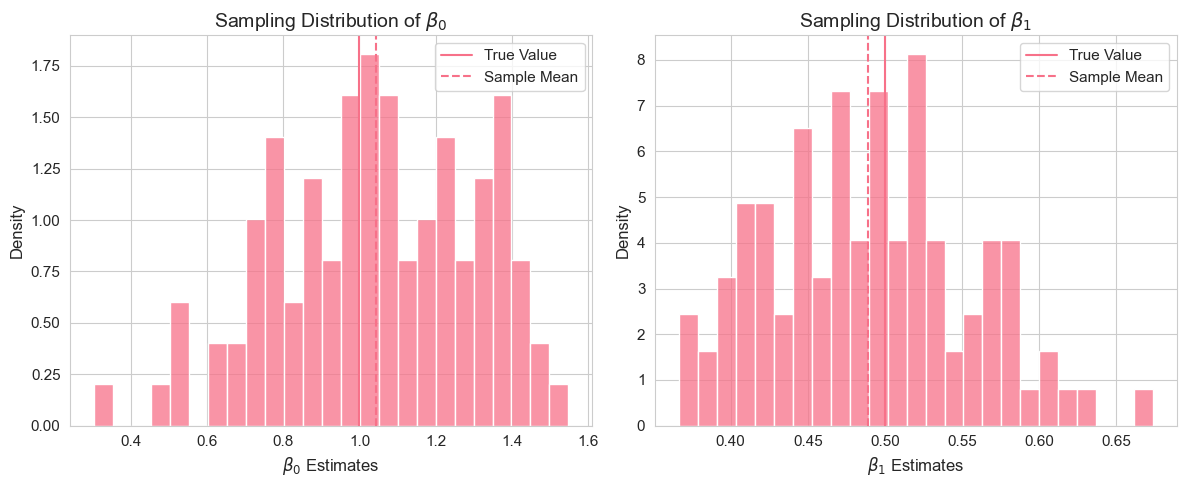

In [23]:
# Set parameters - Simulation parameters (number of replications increased)
np.random.seed(1234567)  # Set seed
n = 1000  # sample size
r = 100  # number of replications (reduced from 10000 for faster execution)
beta0 = 1  # true intercept
beta1 = 0.5  # true slope
sigma_u = 2  # standard deviation of error term

# Initialize arrays to store results - Arrays to store estimated beta_0 and beta_1 from each replication
b0 = np.empty(r)  # Array for intercept estimates
b1 = np.empty(r)  # Array for slope estimates

# Generate fixed x values - Keep x values constant across replications to isolate variability from error term
x = stats.norm.rvs(4, 1, size=n)  # Fixed x values from normal distribution

# Perform Monte Carlo simulation - Loop through replications, generate y, estimate model, store coefficients
for i in range(r):  # Loop for r replications
    # Generate new error terms and y values for each replication - Generate new u and y for each sample
    u = stats.norm.rvs(0, sigma_u, size=n)  # New error terms for each replication
    y = beta0 + beta1 * x + u  # Generate y based on fixed x and new u
    df = pd.DataFrame({"y": y, "x": x})  # Create DataFrame

    # Estimate model and store coefficients - Fit OLS and store estimated coefficients
    results = smf.ols(formula="y ~ x", data=df).fit()  # Fit OLS model
    b0[i] = results.params.iloc[0]  # Store estimated intercept, using iloc for position
    b1[i] = results.params.iloc[1]  # Store estimated slope, using iloc for position

# Display Monte Carlo results
monte_carlo_results = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)"],
        "True Value": [beta0, beta1],
        "Mean Estimate": [np.mean(b0), np.mean(b1)],
        "Standard Deviation": [np.std(b0, ddof=1), np.std(b1, ddof=1)],
        "Summary": [
            f"True: {beta0:.4f}, Mean: {np.mean(b0):.4f}, SD: {np.std(b0, ddof=1):.4f}",
            f"True: {beta1:.4f}, Mean: {np.mean(b1):.4f}, SD: {np.std(b1, ddof=1):.4f}",
        ],
    },
)
monte_carlo_results[["Parameter", "Summary"]]

# Create sampling distribution visualization with seaborn defaults
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Beta_0 distribution
sns.histplot(b0, bins=25, stat="density", ax=axes[0])
axes[0].axvline(beta0, linestyle="-", label="True Value")
axes[0].axvline(np.mean(b0), linestyle="--", label="Sample Mean")
axes[0].set_title("Sampling Distribution of $\\beta_0$")
axes[0].set_xlabel("$\\beta_0$ Estimates")
axes[0].legend()

# Beta_1 distribution
sns.histplot(b1, bins=25, stat="density", ax=axes[1])
axes[1].axvline(beta1, linestyle="-", label="True Value")
axes[1].axvline(np.mean(b1), linestyle="--", label="Sample Mean")
axes[1].set_title("Sampling Distribution of $\\beta_1$")
axes[1].set_xlabel("$\\beta_1$ Estimates")
axes[1].legend()

plt.tight_layout()

This code performs a Monte Carlo simulation with a large number of replications (e.g., 10000). In each replication, it generates new error terms and $y$ values while keeping the $x$ values fixed. It estimates the OLS regression and stores the estimated coefficients. After all replications, it calculates the mean and standard deviation of the estimated coefficients and plots histograms of their sampling distributions.

:::{note} Interpretation of Example 2.13.2
:class: dropdown

By running this code, you will observe the sampling distributions of $\hat{\beta}_0$ and $\hat{\beta}_1$. The histograms should be roughly bell-shaped (approximating normal distributions, due to the Central Limit Theorem). Importantly, you should see that the mean of the estimated coefficients (vertical green dashed line in the histograms) is very close to the true population parameters (vertical red dashed line). This empirically demonstrates the unbiasedness of the OLS estimators under the SLR assumptions. The standard deviations of the estimated coefficients provide a measure of their sampling variability.
:::

### 2.7.3. Violation of SLR.4 (Zero Conditional Mean)

Now, let's investigate what happens when one of the key assumptions is violated. Consider the violation of SLR.4, the zero conditional mean assumption, i.e., $\text{E}(u|x) \neq 0$. This means that the error term is correlated with $x$. In this case, we expect OLS estimators to be biased. Let's simulate a scenario where this assumption is violated and see the results.

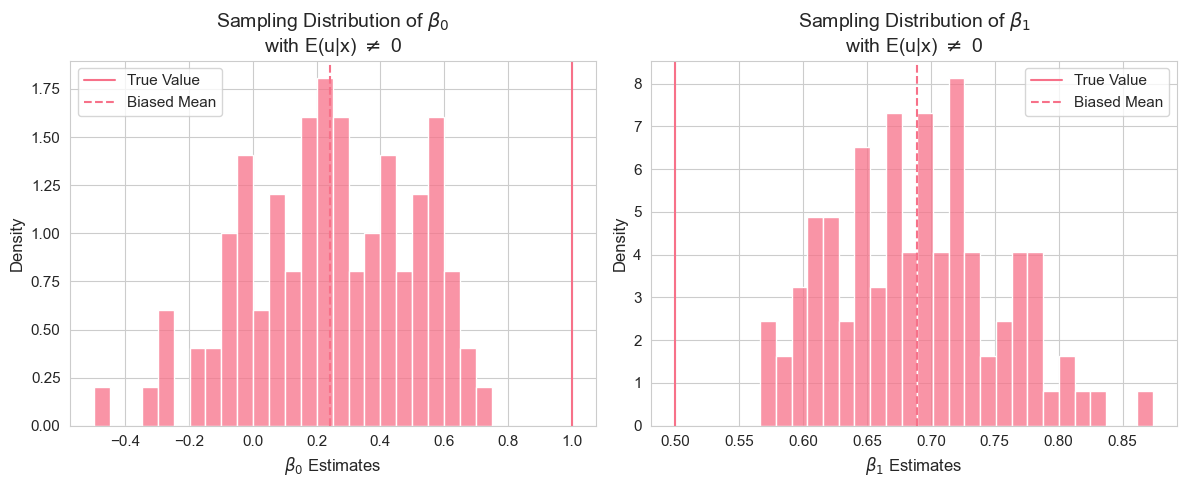

In [24]:
# Set parameters - Simulation parameters (same as before)
np.random.seed(1234567)  # Set seed
n = 1000
r = 100  # reduced from 10000 for faster execution
beta0 = 1
beta1 = 0.5
sigma_u = 2

# Initialize arrays - Arrays to store estimated coefficients
b0 = np.empty(r)
b1 = np.empty(r)

# Generate fixed x values - Fixed x values
x = stats.norm.rvs(4, 1, size=n)

# Perform Monte Carlo simulation with E(u|x) $\neq$ 0 - Simulation loop with violation of SLR.4
for i in range(r):  # Loop for replications
    # Generate errors with non-zero conditional mean - Error term depends on x, violating SLR.4
    u_mean = (x - 4) / 5  # E(u|x) = (x - 4)/5 - Conditional mean of error depends on x
    u = stats.norm.rvs(
        u_mean,
        sigma_u,
        size=n,
    )  # Error term with non-zero conditional mean
    y = beta0 + beta1 * x + u  # Generate y with biased error term
    df = pd.DataFrame({"y": y, "x": x})  # Create DataFrame

    # Estimate model - Fit OLS model
    results = smf.ols(formula="y ~ x", data=df).fit()  # Fit OLS model
    b0[i] = results.params.iloc[0]  # Store estimated intercept, using iloc for position
    b1[i] = results.params.iloc[1]  # Store estimated slope, using iloc for position

# Display Monte Carlo results with bias analysis
bias_results = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)"],
        "True Value": [beta0, beta1],
        "Mean Estimate": [np.mean(b0), np.mean(b1)],
        "Bias": [np.mean(b0) - beta0, np.mean(b1) - beta1],
        "Analysis": [
            f"True: {beta0:.4f}, Estimate: {np.mean(b0):.4f}, Bias: {np.mean(b0) - beta0:.4f}",
            f"True: {beta1:.4f}, Estimate: {np.mean(b1):.4f}, Bias: {np.mean(b1) - beta1:.4f}",
        ],
    },
)
bias_results[["Parameter", "Analysis"]]

# Create bias visualization with seaborn defaults
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Beta_0 distribution showing bias
sns.histplot(b0, bins=25, stat="density", ax=axes[0])
axes[0].axvline(beta0, linestyle="-", label="True Value")
axes[0].axvline(np.mean(b0), linestyle="--", label="Biased Mean")
axes[0].set_title("Sampling Distribution of $\\beta_0$\nwith E(u|x) $\\neq$ 0")
axes[0].set_xlabel("$\\beta_0$ Estimates")
axes[0].legend()

# Beta_1 distribution showing bias
sns.histplot(b1, bins=25, stat="density", ax=axes[1])
axes[1].axvline(beta1, linestyle="-", label="True Value")
axes[1].axvline(np.mean(b1), linestyle="--", label="Biased Mean")
axes[1].set_title("Sampling Distribution of $\\beta_1$\nwith E(u|x) $\\neq$ 0")
axes[1].set_xlabel("$\\beta_1$ Estimates")
axes[1].legend()

plt.tight_layout()

In this code, we intentionally violate the zero conditional mean assumption by setting the mean of the error term to be dependent on $x$: $\text{E}(u|x) = (x - 4)/5$. We then perform the Monte Carlo simulation and examine the results.

:::{note} Interpretation of Example 2.13.3
:class: dropdown

By running this simulation, you will observe that the mean of the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are no longer close to the true values $\beta_0$ and $\beta_1$. The bias, calculated as the difference between the mean estimate and the true value, will be noticeably different from zero. This empirically demonstrates that when the zero conditional mean assumption (SLR.4) is violated, the OLS estimators become biased. The histograms of the sampling distributions will be centered around the biased mean estimates, not the true values.
:::

### 2.7.4. Violation of SLR.5 (Homoscedasticity)

Finally, let's consider the violation of SLR.5, the homoscedasticity assumption, i.e., $\text{var}(u|x) \neq \sigma^2$. This means that the variance of the error term is not constant across values of $x$ (heteroscedasticity). While heteroscedasticity does not cause bias in OLS estimators, it affects their efficiency and the validity of standard errors and inference. Let's simulate a scenario with heteroscedasticity.

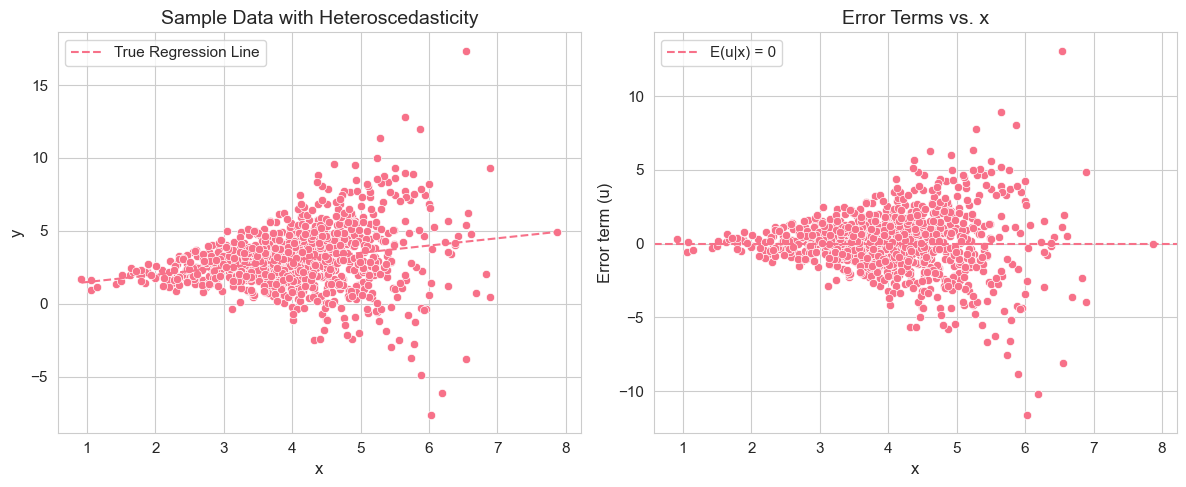

In [25]:
# Set parameters - Simulation parameters (same as before)
np.random.seed(1234567)  # Set seed
n = 1000
r = 100  # reduced from 10000 for faster execution
beta0 = 1
beta1 = 0.5

# Initialize arrays - Arrays to store estimated coefficients
b0 = np.empty(r)
b1 = np.empty(r)

# Generate fixed x values - Fixed x values
x = stats.norm.rvs(4, 1, size=n)

# Perform Monte Carlo simulation with heteroscedasticity - Simulation loop with violation of SLR.5
for i in range(r):  # Loop for replications
    # Generate errors with variance depending on x - Error variance depends on x, violating SLR.5
    u_var = (
        4 / np.exp(4.5) * np.exp(x)
    )  # var(u|x) = 4e^(x-4.5) - Conditional variance depends on x
    u = stats.norm.rvs(
        0,
        np.sqrt(u_var),
        size=n,
    )  # Error term with heteroscedastic variance
    y = beta0 + beta1 * x + u  # Generate y with heteroscedastic errors
    df = pd.DataFrame({"y": y, "x": x})  # Create DataFrame

    # Estimate model - Fit OLS model
    results = smf.ols(formula="y ~ x", data=df).fit()  # Fit OLS model
    b0[i] = results.params.iloc[0]  # Store estimated intercept, using iloc for position
    b1[i] = results.params.iloc[1]  # Store estimated slope, using iloc for position

# Display Monte Carlo results with heteroscedasticity
heteroscedasticity_results = pd.DataFrame(
    {
        "Parameter": ["Intercept ($\\beta_0$)", "Slope ($\\beta_1$)"],
        "True Value": [beta0, beta1],
        "Mean Estimate": [np.mean(b0), np.mean(b1)],
        "Standard Deviation": [np.std(b0, ddof=1), np.std(b1, ddof=1)],
        "Summary": [
            f"True: {beta0:.4f}, Mean: {np.mean(b0):.4f}, SD: {np.std(b0, ddof=1):.4f}",
            f"True: {beta1:.4f}, Mean: {np.mean(b1):.4f}, SD: {np.std(b1, ddof=1):.4f}",
        ],
    },
)
heteroscedasticity_results[["Parameter", "Summary"]]

# Create heteroscedasticity visualization with seaborn defaults
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Simple scatter plot with heteroscedasticity
sns.scatterplot(x=x, y=y, ax=axes[0])
x_range = np.linspace(x.min(), x.max(), 100)
axes[0].plot(x_range, beta0 + beta1 * x_range, "--", label="True Regression Line")
axes[0].set_title("Sample Data with Heteroscedasticity")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()

# Error term visualization
sns.scatterplot(x=x, y=u, ax=axes[1])
axes[1].axhline(y=0, linestyle="--", label="E(u|x) = 0")
axes[1].set_title("Error Terms vs. x")
axes[1].set_xlabel("x")
axes[1].set_ylabel("Error term (u)")
axes[1].legend()

plt.tight_layout()

In this code, we introduce heteroscedasticity by making the variance of the error term dependent on $x$: $\text{var}(u|x) = 4e^{(x-4.5)}$. We then perform the Monte Carlo simulation.

:::{note} Interpretation of Example 2.13.4
:class: dropdown

By running this simulation, you will observe that the mean of the estimated coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ are still close to the true values $\beta_0$ and $\beta_1$. This confirms that OLS estimators remain unbiased even under heteroscedasticity (as long as SLR.1-SLR.4 hold). However, you might notice that the standard deviations of the estimated coefficients (sampling variability) could be different compared to the homoscedastic case (Example 2.7.2), although unbiasedness is maintained. The scatter plot of data with heteroscedasticity will show that the spread of data points around the regression line is not constant across the range of $x$. The plot of error terms vs. $x$ directly visualizes the heteroscedasticity, as you'll see the spread of error terms changing with $x$.
:::

Through these Monte Carlo simulations, we have empirically explored the properties of OLS estimators and the consequences of violating some of the key assumptions of the simple linear regression model.

This concludes our exploration of the Simple Regression Model. We have covered the basics of OLS estimation, interpretation of results, goodness of fit, nonlinear transformations, special regression cases, and the importance of underlying assumptions. We also used Monte Carlo simulations to understand the statistical properties of OLS estimators. This foundation is crucial for understanding more advanced econometric techniques and models in subsequent chapters.